### Uczenie maszynowe
# 3. Regresja liniowa – część 2

## 3.1. Regresja liniowa wielu zmiennych

Do przewidywania wartości $y$ możemy użyć więcej niż jednej cechy $x$:

### Przykład – ceny mieszkań

In [70]:
import csv

reader = csv.reader(open("data02_train.tsv", encoding="utf-8"), delimiter="\t")
for i, row in enumerate(list(reader)[:10]):
    if i == 0:
        print(
            " ".join(
                [
                    "{}: {:8}".format("x" + str(j) if j > 0 else "y ", entry)
                    for j, entry in enumerate(row)
                ]
            )
        )
    else:
        print(" ".join(["{:12}".format(entry) for entry in row]))


y : price    x1: isNew    x2: rooms    x3: floor    x4: location x5: sqrMetres
476118.0     False        3            1            Centrum      78          
459531.0     False        3            2            Sołacz       62          
411557.0     False        3            0            Sołacz       15          
496416.0     False        4            0            Sołacz       14          
406032.0     False        3            0            Sołacz       15          
450026.0     False        3            1            Naramowice   80          
571229.15    False        2            4            Wilda        39          
325000.0     False        3            1            Grunwald     54          
268229.0     False        2            1            Grunwald     90          


$$ x^{(2)} = ({\rm "False"}, 3, 2, {\rm "Sołacz"}, 62), \quad x_3^{(2)} = 2 $$

### Hipoteza

W naszym przypadku (wybraliśmy 5 cech):

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5 $$

W ogólności ($n$ cech):

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n $$

Jeżeli zdefiniujemy $x_0 = 1$, będziemy mogli powyższy wzór zapisać w bardziej kompaktowy sposób:

$$
\begin{array}{rcl}
h_\theta(x)
 & = & \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n \\
 & = & \displaystyle\sum_{i=0}^{n} \theta_i x_i \\
 & = & \theta^T \, x \\
 & = & x^T \, \theta \\
\end{array}
$$

### Metoda gradientu prostego – notacja macierzowa

Metoda gradientu prostego przyjmie bardzo elegancką formę, jeżeli do jej zapisu użyjemy wektorów i macierzy.

$$
X=\left[\begin{array}{cc}
1 & \left( \vec x^{(1)} \right)^T \\
1 & \left( \vec x^{(2)} \right)^T \\
\vdots & \vdots\\
1 & \left( \vec x^{(m)} \right)^T \\
\end{array}\right] 
= \left[\begin{array}{cccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots\\
1 & x_1^{(m)} & \cdots & x_n^{(m)} \\
\end{array}\right]
\quad
\vec{y} = 
\left[\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{array}\right]
\quad
\theta = \left[\begin{array}{c}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n\\
\end{array}\right]
$$

In [71]:
# Wersje macierzowe funkcji rysowania wykresów punktowych oraz krzywej regresyjnej


def hMx(theta, X):
    return X * theta


def regdotsMx(X, y):
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c="r", s=50, label="Dane")

    ax.set_xlabel("Populacja")
    ax.set_ylabel("Zysk")
    ax.margins(0.05, 0.05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig


def reglineMx(fig, fun, theta, X):
    ax = fig.axes[0]
    x0, x1 = np.min(X[:, 1]), np.max(X[:, 1])
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2, 2)
    ax.plot(
        L,
        fun(theta, LX),
        linewidth="2",
        label=(
            r"$y={theta0:.2}{op}{theta1:.2}x$".format(
                theta0=float(theta[0][0]),
                theta1=(
                    float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])
                ),
                op="+" if theta[1][0] >= 0 else "-",
            )
        ),
    )


In [72]:
# Wczytwanie danych z pliku za pomocą numpy – regresja liniowa wielu zmiennych – notacja macierzowa

import pandas

data = pandas.read_csv(
    "data02_train.tsv", delimiter="\t", usecols=["price", "rooms", "floor", "sqrMetres"]
)
m, n_plus_1 = data.values.shape
n = n_plus_1 - 1
Xn = data.values[:, 1:].reshape(m, n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx = np.matrix(data.values[:, 0]).reshape(m, 1)

print(XMx[:5])
print(XMx.shape)

print()

print(yMx[:5])
print(yMx.shape)


[[ 1.  3.  1. 78.]
 [ 1.  3.  2. 62.]
 [ 1.  3.  0. 15.]
 [ 1.  4.  0. 14.]
 [ 1.  3.  0. 15.]]
(1339, 4)

[[476118.]
 [459531.]
 [411557.]
 [496416.]
 [406032.]]
(1339, 1)


### Funkcja kosztu – notacja macierzowa

$$J(\theta)=\dfrac{1}{2|\vec y|}\left(X\theta-\vec{y}\right)^T\left(X\theta-\vec{y}\right)$$ 


In [73]:
from IPython.display import display, Math, Latex


def JMx(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()


thetaMx = np.matrix([10, 90, -1, 2.5]).reshape(4, 1)

cost = JMx(thetaMx, XMx, yMx)
display(Math(r"\Large J(\theta) = %.4f" % cost))


<IPython.core.display.Math object>

### Gradient – notacja macierzowa

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T\left(X\theta-\vec y\right)$$

In [74]:
from IPython.display import display, Math, Latex


def dJMx(theta, X, y):
    """Wersja macierzowa gradientu funckji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y))


thetaMx = np.matrix([10, 90, -1, 2.5]).reshape(4, 1)

display(
    Math(
        r"\large \theta = "
        + LatexMatrix(thetaMx)
        + r"\quad"
        + r"\large \nabla J(\theta) = "
        + LatexMatrix(dJMx(thetaMx, XMx, yMx))
    )
)


<IPython.core.display.Math object>

### Algorytm gradientu prostego – notacja macierzowa

$$ \theta := \theta - \alpha \, \nabla J(\theta) $$

In [75]:
# Implementacja algorytmu gradientu prostego za pomocą numpy i macierzy


def GDMx(fJ, fdJ, theta, X, y, alpha, eps):
    current_cost = fJ(theta, X, y)
    history = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)  # implementacja wzoru
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) <= eps:
            break
        if current_cost > prev_cost:
            print("Długość kroku (alpha) jest zbyt duża!")
            break
        history.append([current_cost, theta])
    return theta, history


thetaStartMx = np.zeros((n + 1, 1))

# Zmieniamy wartości alpha (rozmiar kroku) oraz eps (kryterium stopu)
thetaBestMx, history = GDMx(JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.0001, eps=0.1)

######################################################################
display(
    Math(
        r"\large\textrm{Wynik:}\quad \theta = "
        + LatexMatrix(thetaBestMx)
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{po %d iteracjach}" % len(history)
    )
)


<IPython.core.display.Math object>

## 3.2. Metoda gradientu prostego w praktyce

### Kryterium stopu

Algorytm gradientu prostego polega na wykonywaniu określonych kroków w pętli. Pytanie brzmi: kiedy należy zatrzymać wykonywanie tej pętli?

W każdej kolejnej iteracji wartość funkcji kosztu maleje o coraz mniejszą wartość.
Parametr `eps` określa, jaka wartość graniczna tej różnicy jest dla nas wystarczająca:

 * Im mniejsza wartość `eps`, tym dokładniejszy wynik, ale dłuższy czas działania algorytmu.
 * Im większa wartość `eps`, tym krótszy czas działania algorytmu, ale mniej dokładny wynik.

Na wykresie zobaczymy porównanie regresji dla różnych wartości `eps`

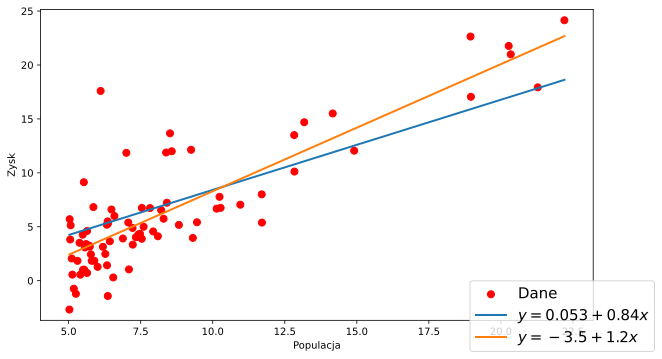

In [76]:
# Wczytwanie danych z pliku za pomocą numpy – wersja macierzowa
data = np.loadtxt("data01_train.csv", delimiter=",")
m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n].reshape(m, n)

# Dodaj kolumnę jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx = np.matrix(data[:, 1]).reshape(m, 1)

thetaStartMx = np.zeros((2, 1))

fig = regdotsMx(XMx, yMx)
theta_e1, history1 = GDMx(
    JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.01
)  # niebieska linia
reglineMx(fig, hMx, theta_e1, XMx)
theta_e2, history2 = GDMx(
    JMx, dJMx, thetaStartMx, XMx, yMx, alpha=0.01, eps=0.000001
)  # pomarańczowa linia
reglineMx(fig, hMx, theta_e2, XMx)
legend(fig)


In [77]:
display(
    Math(
        r"\theta_{10^{-2}} = "
        + LatexMatrix(theta_e1)
        + r"\quad\theta_{10^{-6}} = "
        + LatexMatrix(theta_e2)
    )
)


<IPython.core.display.Math object>

### Długość kroku ($\alpha$)

In [78]:
# Jak zmienia się koszt w kolejnych krokach w zależności od alfa


def costchangeplot(history):
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel("krok")
    ax.set_ylabel(r"$J(\theta)$")

    X = np.arange(0, 500, 1)
    Y = [history[step][0] for step in X]
    ax.plot(X, Y, linewidth="2", label=(r"$J(\theta)$"))
    return fig


def slide7(alpha):
    best_theta, history = gradient_descent(
        h, J, [0.0, 0.0], x, y, alpha=alpha, eps=0.0001
    )
    fig = costchangeplot(history)
    legend(fig)


sliderAlpha1 = widgets.FloatSlider(
    min=0.01, max=0.03, step=0.001, value=0.02, description=r"$\alpha$", width=300
)


In [79]:
widgets.interact_manual(slide7, alpha=sliderAlpha1)


interactive(children=(FloatSlider(value=0.02, description='$\\alpha$', max=0.03, min=0.01, step=0.001), Button…

<function __main__.slide7(alpha)>

## 3.3. Normalizacja danych

Normalizacja danych to proces, który polega na dostosowaniu danych wejściowych w taki sposób, żeby ułatwić działanie algorytmowi gradientu prostego.

Wyjaśnię to na przykladzie.

Użyjemy danych z „Gratka flats challenge 2017”.

Rozważmy model $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$, w którym cena mieszkania prognozowana jest na podstawie liczby pokoi $x_1$ i metrażu $x_2$:

In [81]:
# Wczytanie danych przy pomocy biblioteki pandas
import pandas

alldata = pandas.read_csv(
    "data_flats.tsv", header=0, sep="\t", usecols=["price", "rooms", "sqrMetres"]
)
alldata[:10]


price  rooms  sqrMetres
0  476118.00      3         78
1  459531.00      3         62
2  411557.00      3         15
3  496416.00      4         14
4  406032.00      3         15
5  450026.00      3         80
6  571229.15      2         39
7  325000.00      3         54
8  268229.00      2         90
9  604836.00      4         40

In [82]:
# Funkcja, która pokazuje wartości minimalne i maksymalne w macierzy X


def show_mins_and_maxs(XMx):
    mins = np.amin(XMx, axis=0).tolist()[0]  # wartości minimalne
    maxs = np.amax(XMx, axis=0).tolist()[0]  # wartości maksymalne
    for i, (xmin, xmax) in enumerate(zip(mins, maxs)):
        display(Math(r"${:.2F} \leq x_{} \leq {:.2F}$".format(xmin, i, xmax)))


In [83]:
# Przygotowanie danych

import numpy as np

%matplotlib inline

data2 = np.matrix(alldata[['rooms', 'sqrMetres', 'price']])

m, n_plus_1 = data2.shape
n = n_plus_1 - 1
Xn = data2[:, 0:n]

XMx2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
yMx2 = np.matrix(data2[:, -1]).reshape(m, 1) / 1000.0

Cechy w danych treningowych przyjmują wartości z zakresu:

In [84]:
show_mins_and_maxs(XMx2)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Jak widzimy, $x_2$ przyjmuje wartości dużo większe niż $x_1$.
Powoduje to, że wykres funkcji kosztu jest bardzo „spłaszczony” wzdłuż jednej z osi:

In [85]:
def contour_plot(X, y, rescale=10**8):
    theta0_vals = np.linspace(-100000, 100000, 100)
    theta1_vals = np.linspace(-100000, 100000, 100)

    J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))
    for t1, element in enumerate(theta0_vals):
        for t2, element2 in enumerate(theta1_vals):
            thetaT = np.matrix([1.0, element, element2]).reshape(3, 1)
            J_vals[t1, t2] = JMx(thetaT, X, y) / rescale

    plt.figure()
    plt.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")


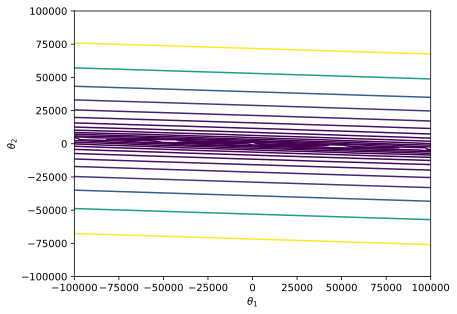

In [86]:
contour_plot(XMx2, yMx2, rescale=10**10)


Jeżeli funkcja kosztu ma kształt taki, jak na powyższym wykresie, to łatwo sobie wyobrazić, że znalezienie minimum lokalnego przy użyciu metody gradientu prostego musi stanowć nie lada wyzwanie: algorytm szybko znajdzie „rynnę”, ale „zjazd” wzdłuż „rynny” w poszukiwaniu minimum będzie odbywał się bardzo powoli.

Jak temu zaradzić?

Spróbujemy przekształcić dane tak, żeby funkcja kosztu miała „ładny”, regularny kształt.

### Skalowanie

Będziemy dążyć do tego, żeby każda z cech przyjmowała wartości w podobnym zakresie.

W tym celu przeskalujemy wartości każdej z cech, dzieląc je przez wartość maksymalną:

$$ \hat{x_i}^{(j)} := \frac{x_i^{(j)}}{\max_j x_i^{(j)}} $$

In [87]:
XMx2_scaled = XMx2 / np.amax(XMx2, axis=0)

show_mins_and_maxs(XMx2_scaled)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

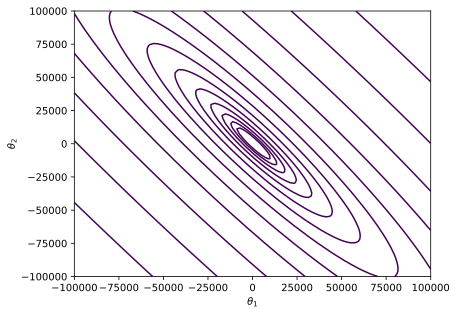

In [88]:
contour_plot(XMx2_scaled, yMx2)


### Normalizacja średniej

Będziemy dążyć do tego, żeby dodatkowo średnia wartość każdej z cech była w okolicach $0$.

W tym celu oprócz przeskalowania odejmiemy wartość średniej od wartości każdej z cech:

$$ \hat{x_i}^{(j)} := \frac{x_i^{(j)} - \mu_i}{\max_j x_i^{(j)}} $$

In [89]:
XMx2_norm = (XMx2 - np.mean(XMx2, axis=0)) / np.amax(XMx2, axis=0)

show_mins_and_maxs(XMx2_norm)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

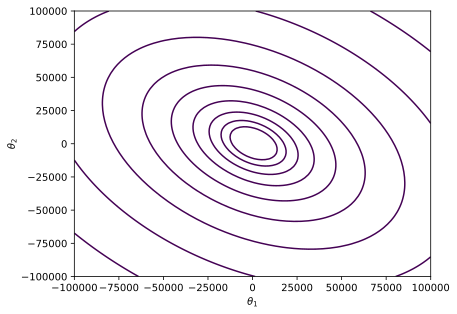

In [90]:
contour_plot(XMx2_norm, yMx2)


Teraz funkcja kosztu ma wykres o bardzo regularnym kształcie – algorytm gradientu prostego zastosowany w takim przypadku bardzo szybko znajdzie minimum funkcji kosztu.